# Stroke Predction Project 

[![Follow @StrokePred on Twitter](https://img.shields.io/twitter/follow/strokepred?style=social)](https://twitter.com/StrokePred)


#### This project is done as a requirement of T5 Bootscamp by Jefn Alshammari and Abdulaziz Almass

<img src="https://topnews.in/healthcare/sites/default/files/styles/large/public/Stroke7.jpg?itok=xInaWFYK" width="200" height="200">

## 1- Data Collection

The dataset is found at [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

The following Python libraries is imported in our project: 

* Pandas

* Numpy

* Matplotlib

* Seaborn

In [1549]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

stroke_df = pd.read_csv("https://raw.githubusercontent.com/jefnkhalaf/Stroke-Prediction/main/MVP/stroke.csv")

In [1550]:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [1551]:
print("Number of data points in our dataset is: "+str(len(stroke_df.index)))

Number of data points in our dataset is: 5110


In [1552]:
print("Number of dependent and independent variables in our dataset is: "+str(len(stroke_df.columns)))

Number of dependent and independent variables in our dataset is: 12


## 2- Data Wrangling / Cleaning

In [1553]:
stroke_df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [1554]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

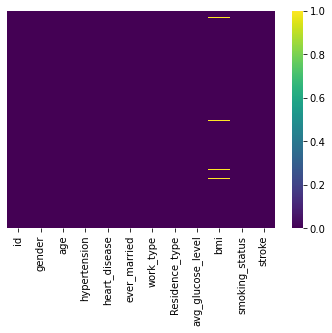

In [1555]:
sns.heatmap(stroke_df.isnull(), yticklabels=False, cmap="viridis");

In [1556]:
#Finding the mean of the column "bmi" having NaN
mean_bmi=stroke_df['bmi'].mean()
  
# Replace NaNs in column "bmi" with the mean value of bmi
stroke_df['bmi'].fillna(value=mean_bmi, inplace=True)
print("The mean value of BMI = " +str(mean_bmi))

The mean value of BMI = 28.893236911794673


In [1557]:
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [1558]:
#Gendercheck = pd.get_dummies(stroke_df['gender'], drop_first=True)
#Gendercheck.head(5)

#### Discover how many records with "stroke" value of 1

In [1559]:
print("Number of people who ever got a stroke is: "+str(sum(stroke_df['stroke'] == 1))+" out of "+str(len(stroke_df.index)))

Number of people who ever got a stroke is: 249 out of 5110


In [1560]:
print("Number of people with gender 'other' is: "+str(sum(stroke_df['gender'] == 'Other')))

Number of people with gender 'other' is: 1


#### Since number of records with gender of "Other" is only one record, it is better to be dropped.

In [1561]:
stroke_df.drop(stroke_df[stroke_df['gender'] == "Other"].index, inplace = True)

#### It is needed to discover how many "Unknown" values of the smoking status.

In [1562]:
print("Number of Unknown cases if smoking is: "+str(sum(stroke_df['smoking_status'] == "Unknown")))

Number of Unknown cases if smoking is: 1544


#### Since it influences the analysis and we should get the smoking status, records with "Unkown" status are droped

In [1563]:
stroke_df.drop(stroke_df[stroke_df['smoking_status'] == "Unknown"].index, inplace = True)

#### Now we discover how many records with stroke value of "1" is remaining after dropping the records with "Unknown" smoking status 

In [1564]:
print("Number of Unknown cases if smoking is: "+str(sum(stroke_df['smoking_status'] == "Unknown")))

Number of Unknown cases if smoking is: 0


#### We get to discover how many data points / records are remaining to make sure it the exact number 

In [1565]:
print("Number of data points in our dataset is: "+str(len(stroke_df.index)))

Number of data points in our dataset is: 3565


In [1566]:
print("Number of people who ever got a stroke is: "+str(sum(stroke_df['stroke'] == 1))+" out of "+str(len(stroke_df.index)))

Number of people who ever got a stroke is: 202 out of 3565


#### One - hot - encoding 

In [1567]:
Gender = pd.get_dummies(stroke_df['gender'], drop_first=True)
Gender.head(2)

,Male
0,1
1,0


In [1568]:
Ever_married = pd.get_dummies(stroke_df['ever_married'], drop_first=True)
Ever_married.head(2)

,Yes
0,1
1,1


In [1569]:
Residence = pd.get_dummies(stroke_df['Residence_type'], drop_first=True)
Residence.head(2)

,Urban
0,1
1,0


In [1570]:
Work = pd.get_dummies(stroke_df['work_type'])
Work.head(2)

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0


In [1571]:
Smoking = pd.get_dummies(stroke_df['smoking_status'])
Smoking.head(2)

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0


In [1572]:
stroke_df.drop(['id', 'gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status'], axis=1, inplace=True)
stroke_df = pd.concat([stroke_df, Gender, Ever_married, Residence, Work, Smoking],axis=1)
stroke_df.rename(columns={'Yes': 'ever_married'}, inplace=True)
stroke_df.head(20)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,ever_married,Urban,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.600000,1,1,1,1,0,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,0,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,1,0,0,1,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,0,0,1,0,0,1,0
5,81.0,0,0,186.21,29.000000,1,1,1,1,0,0,1,0,0,1,0,0
6,74.0,1,1,70.09,27.400000,1,1,1,0,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,1,0,0,1,0,0,1,0,0,0,1,0
10,81.0,1,0,80.43,29.700000,1,0,1,0,0,0,1,0,0,0,1,0
11,61.0,0,1,120.46,36.800000,1,0,1,0,1,0,0,0,0,0,0,1


In [1573]:
stroke_df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Male                 0
ever_married         0
Urban                0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

## 2- Data Analysis

<AxesSubplot:>

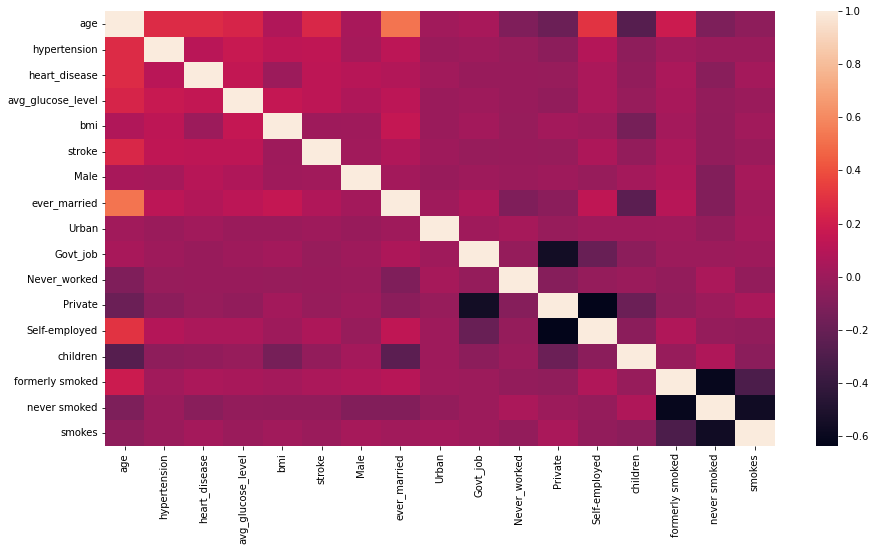

In [1574]:
plt.figure(figsize = (15,8))
sns.heatmap(stroke_df.corr())

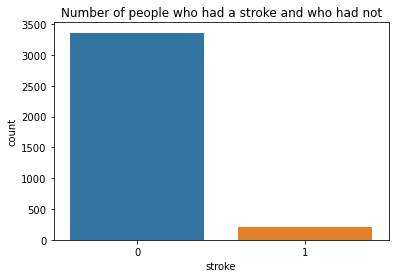

In [1575]:
sns.countplot(x="stroke", data=stroke_df);
plt.title("Number of people who had a stroke and who had not");

In [1576]:
import plotly.express as px
fig_age = px.histogram(stroke_df, x='age', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

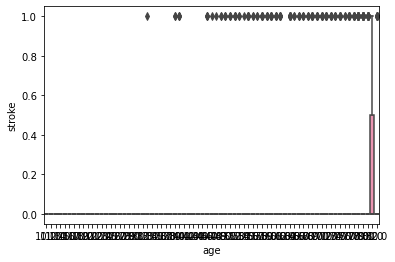

In [1577]:
sns.boxplot(x="age", y="stroke", data=stroke_df);

In [1578]:
import plotly.express as px
fig_age = px.histogram(stroke_df, x='bmi', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

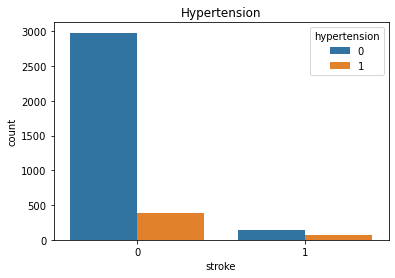

In [1579]:
sns.countplot(x="stroke", hue="hypertension", data=stroke_df);
plt.title("Hypertension");

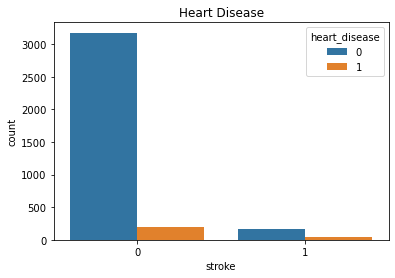

In [1580]:
sns.countplot(x="stroke", hue="heart_disease", data=stroke_df);
plt.title("Heart Disease");

In [1581]:
import plotly.express as px
fig_age = px.histogram(stroke_df, x='avg_glucose_level', color='stroke', barmode='group')
fig_age.update_layout(bargap=0.2)
fig_age.show()

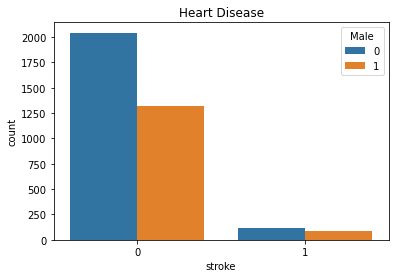

In [1582]:
sns.countplot(x="stroke", hue="Male", data=stroke_df);
plt.title("Heart Disease");

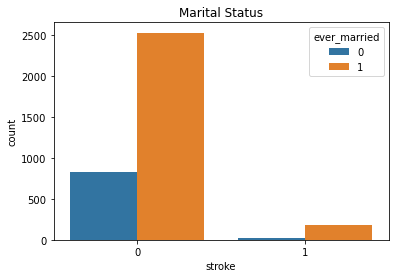

In [1583]:
sns.countplot(x="stroke", hue="ever_married", data=stroke_df);
plt.title("Marital Status");

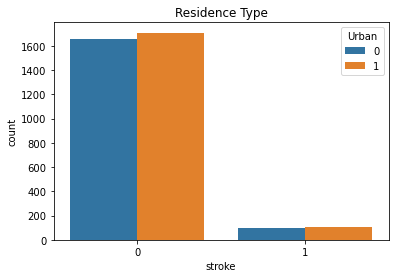

In [1584]:
sns.countplot(x="stroke", hue="Urban", data=stroke_df);
plt.title("Residence Type");

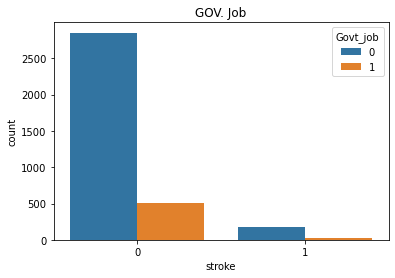

In [1585]:
sns.countplot(x="stroke", hue="Govt_job", data=stroke_df);
plt.title("GOV. Job");

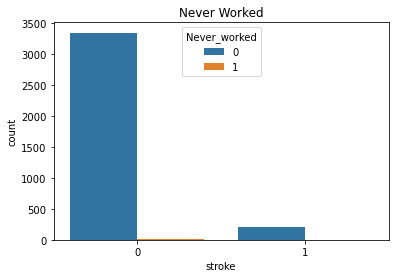

In [1586]:
sns.countplot(x="stroke", hue="Never_worked", data=stroke_df);
plt.title("Never Worked");

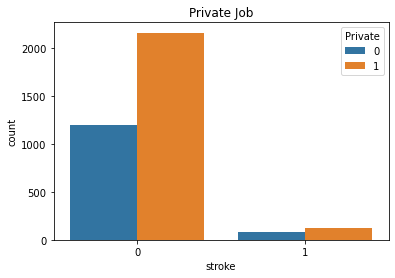

In [1587]:
sns.countplot(x="stroke", hue="Private", data=stroke_df);
plt.title("Private Job");

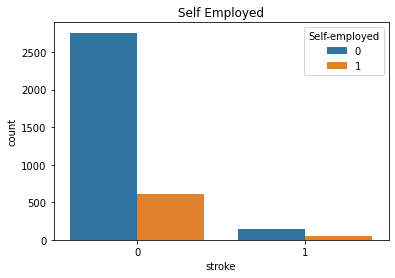

In [1588]:
sns.countplot(x="stroke", hue="Self-employed", data=stroke_df);
plt.title("Self Employed");

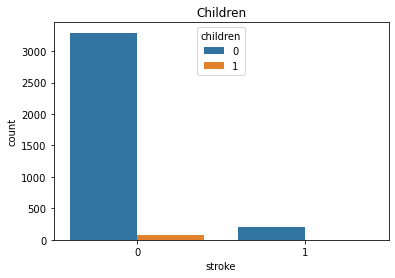

In [1589]:
sns.countplot(x="stroke", hue="children", data=stroke_df);
plt.title("Children");

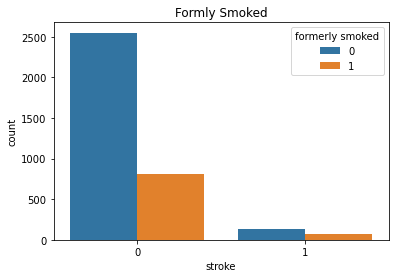

In [1590]:
sns.countplot(x="stroke", hue="formerly smoked", data=stroke_df);
plt.title("Formly Smoked");

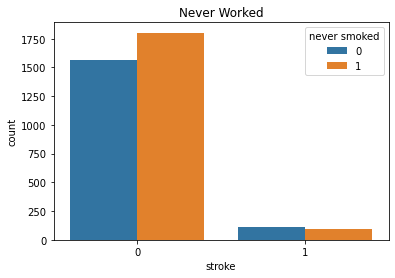

In [1591]:
sns.countplot(x="stroke", hue="never smoked", data=stroke_df);
plt.title("Never Worked");

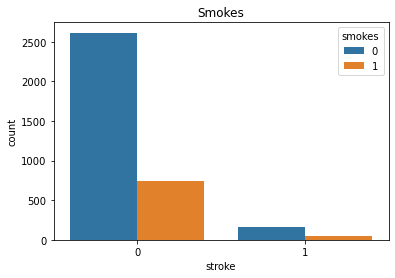

In [1592]:
sns.countplot(x="stroke", hue="smokes", data=stroke_df);
plt.title("Smokes");

In [1593]:
x = stroke_df.loc[:, stroke_df.columns != 'stroke']
y = stroke_df['stroke']

In [1594]:
x.head(1)

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,ever_married,Urban,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,0,1,0,0,1,0,0


In [1599]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42)


In [1600]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


logmodel = LogisticRegression(C = 0.95)
logmodel.fit(x_train,y_train)



C:\Users\M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=0.95)

In [1601]:
logmodel.score(x_train,y_train)


0.9467040673211781

In [1602]:
logmodel.score(x_test,y_test)


0.9298737727910238

In [1605]:
logmodel.coef_

array([[ 7.46512532e-02,  4.33927560e-01,  1.39875925e-01,
         3.97131699e-03, -5.84782247e-04, -7.17062371e-02,
        -1.34055895e-01, -1.50436681e-01, -1.42312542e+00,
        -6.01240590e-02, -8.83749702e-01, -1.53206230e+00,
        -4.36016441e-01, -1.32645549e+00, -1.65679058e+00,
        -1.35183184e+00]])

In [1608]:
 y_prob_pred_test = logmodel.predict_proba(x_test)[:,1]
print(log_loss(y_test,y_prob_pred_test))

0.22592323180650153


In [1610]:
predictions = logmodel.predict(x_test)

print(predictions[0:5])

from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

accuracy=accuracy_score(y_test,predictions)
accuracy

[0 0 0 0 0]


0.9298737727910238

C:\Users\M\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\M\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\M\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



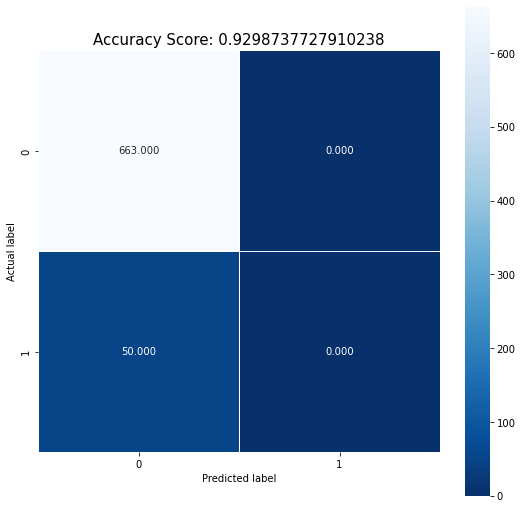

In [1611]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix (y_test,predictions)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

#### The confusion matrix shows inbalanced dataset and it needs furthur actions dealing with to be announced later